## FAILED BANKS ANALYSIS 

 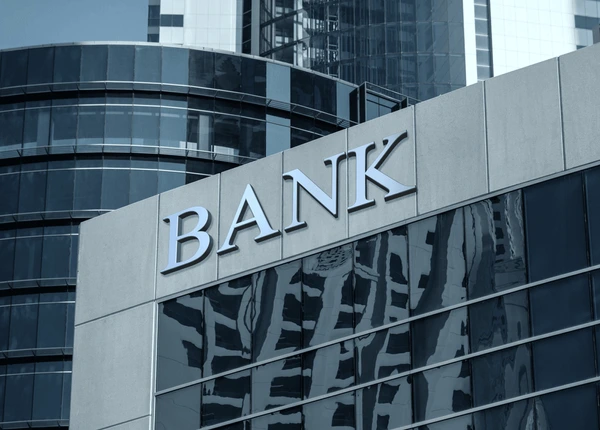

## BUSINESS OVERVIEW

This project aims to analyze the dataset of failed banks to identify key factors contributing to their closure. Using statistical analysis and machine learning techniques, we will examine variables such as asset quality, risk management practices, regulatory compliance, and macro-economic indicators. The insights gained will inform stakeholders about common patterns and trends in bank failures, enabling better risk management strategies and regulatory interventions. The project's outcomes will contribute to a deeper understanding of systemic vulnerabilities in the banking sector and support efforts to enhance financial stability.



## BUSINESS PROBLEM
The bank failures dataset addresses the critical business problem of understanding and mitigating risks within the financial industry. By analyzing historical patterns of bank failures, stakeholders can develop strategies for risk management, regulatory compliance, and market intelligence. This dataset enables stakeholders to identify risk factors, monitor financial stability, and make informed decisions regarding investment, policy-making, and consumer protection. Ultimately, leveraging this dataset allows stakeholders to enhance financial resilience, ensure regulatory compliance, and promote consumer confidence in the banking sector, thereby contributing to overall economic stability and sustainable growth.



>- Emphasizing the critical importance of effective risk management practices in identifying and mitigating potential sources of bank failure.

>- Highlighting the need for robust regulatory oversight to ensure compliance with prudential standards and prevent systemic risks from materializing.

>- Advocating for proactive measures by banks and policymakers to address emerging challenges and vulnerabilities, thereby promoting the long-term   stability of the banking sector in America.

Through a comprehensive analysis and the development of a predictive model, this project aims to provide valuable insights that can inform strategic decision-making and contribute to the resilience and stability of the banking system.


## DATA UNDERSTANDING

The bank failures dataset comprises comprehensive information on banks that have undergone resolution processes, including closure, termination, or failure. It includes details such as the date of resolution, geographic location (city and state), financial costs incurred, asset and deposit figures, charter class, and relevant regulatory actions. The dataset also provides insights into the historical context of bank failures, facilitating analyses of trends, risk factors, and regulatory compliance. With a wide array of attributes spanning financial, geographical, and regulatory dimensions, this dataset serves as a valuable resource for understanding the dynamics and implications of bank failures within the broader financial landscape.

**Columns Description:**

- **RESDATE**: Date of resolution.
- **QBFDEP**: Quasi-bid deposits.
- BIDCITY: City where the bank is located.
- BIDSTATE: State where the bank is located.
- CLOSCD: Closing code.
- BSTATUS: Bank status.
- PSTALP: Postal code.
- COMMENTS: Any additional comments or notes.
- CITYST: City and state combined.
- COSTMOSTRECENTASOF: Cost as of the most recent date.
- RESTYPE: Resolution type.
- URL: URL link.
- PTRDATE: Date of pointer.
- COST: Cost.
- QBFASSET: Quasi-bid assets.
- UNINSDEP: Uninsured deposits.
- ID: Identification.
- TERMI: Termination.
- FAILYR: Year of failure.
- CHCLASS: Charter class.
- FUND: Fund.
- BANKNO: Bank number.
- BIDNAME: Bank name.
- FIN: Financial institution number.
- FAILDATE: Date of failure.
- SAVR: Savings ratio.
- RESTYPE1: Another column related to resolution type.
- CHCLASS1: Another column related to charter class.
- NAME: Name of the bank.
- FSL_PROG: Federal Savings and Loan Program.
- CITY: City.
- CERT: Certification.
- BRDATE: Date of establishment (birth date).

In [2]:
# Import Necessary Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import missingno as msno
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress

%matplotlib inline

In [3]:
# Importing the bank failures.csv file
# viewing the first five rows of the dataset
df=pd.read_csv('bank_failures.csv')
df.head()

,RESDATE,QBFDEP,BIDCITY,BIDSTATE,CLOSCD,BSTATUS,PSTALP,COMMENTS,CITYST,COSTMOSTRECENTASOF,...,FIN,FAILDATE,SAVR,RESTYPE1,CHCLASS1,NAME,FSL_PROG,CITY,CERT,BRDATE
0,11/3/2023,52311.0,EMMETSBURG,IA,PASAN,A,IA,NaN,"SAC CITY, IA",29FEB2024,...,10545,11/3/2023,DIF,PA,NM,CITIZENS BANK,NaN,SAC CITY,8758.0,NaN
1,7/28/2023,130110.0,SYRACUSE,KS,TABAN,A,KS,NaN,"ELKHART, KS",29FEB2024,...,10544,7/28/2023,DIF,PA,SM,HEARTLAND TRI-STATE BANK,NaN,ELKHART,25851.0,NaN
2,5/1/2023,176436706.0,COLUMBUS,OH,TASNN,A,CA,NaN,"SAN FRANCISCO, CA",29FEB2024,...,10543,5/1/2023,DIF,PA,NM,FIRST REPUBLIC BANK,NaN,SAN FRANCISCO,59017.0,NaN
3,3/20/2023,88612911.0,HICKSVILLE,NY,PASNN,A,NY,LCT not performed. DRR will provide data when...,"NEW YORK, NY",29FEB2024,...,10540,3/12/2023,DIF,PA,NM,SIGNATURE BANK,NaN,NEW YORK,57053.0,NaN
4,3/26/2023,175378000.0,RALEIGH,NC,DTBNA,A,CA,LCT not performed. DRR will provide data when...,"SANTA CLARA, CA",29FEB2024,...,10539,3/7/2023,DIF,PA,SM,SILICON VALLEY BANK,NaN,SANTA CLARA,24735.0,NaN


In [4]:
# Finding the shape of the dataframe
df.shape

(4109, 33)

>The datasets has 4109 rows and 33 columns

In [5]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RESDATE             3526 non-null   object 
 1   QBFDEP              4107 non-null   float64
 2   BIDCITY             3297 non-null   object 
 3   BIDSTATE            3056 non-null   object 
 4   CLOSCD              2653 non-null   object 
 5   BSTATUS             2900 non-null   object 
 6   PSTALP              4109 non-null   object 
 7   COMMENTS            75 non-null     object 
 8   CITYST              4109 non-null   object 
 9   COSTMOSTRECENTASOF  3547 non-null   object 
 10  RESTYPE             4109 non-null   object 
 11  URL                 3615 non-null   object 
 12  PTRDATE             533 non-null    object 
 13  COST                3472 non-null   float64
 14  QBFASSET            3955 non-null   float64
 15  UNINSDEP            167 non-null    float64
 16  ID    

>`BRDATE`,`FSL_PROG`,`BANKNO`,`UNINSDEP`,`COMMENTS`,`PTRDATE` columns have the most null values

In [6]:
df

,RESDATE,QBFDEP,BIDCITY,BIDSTATE,CLOSCD,BSTATUS,PSTALP,COMMENTS,CITYST,COSTMOSTRECENTASOF,...,FIN,FAILDATE,SAVR,RESTYPE1,CHCLASS1,NAME,FSL_PROG,CITY,CERT,BRDATE
0,11/3/2023,52311.0,EMMETSBURG,IA,PASAN,A,IA,NaN,"SAC CITY, IA",29FEB2024,...,10545,11/3/2023,DIF,PA,NM,CITIZENS BANK,NaN,SAC CITY,8758.0,NaN
1,7/28/2023,130110.0,SYRACUSE,KS,TABAN,A,KS,NaN,"ELKHART, KS",29FEB2024,...,10544,7/28/2023,DIF,PA,SM,HEARTLAND TRI-STATE BANK,NaN,ELKHART,25851.0,NaN
2,5/1/2023,176436706.0,COLUMBUS,OH,TASNN,A,CA,NaN,"SAN FRANCISCO, CA",29FEB2024,...,10543,5/1/2023,DIF,PA,NM,FIRST REPUBLIC BANK,NaN,SAN FRANCISCO,59017.0,NaN
3,3/20/2023,88612911.0,HICKSVILLE,NY,PASNN,A,NY,LCT not performed. DRR will provide data when...,"NEW YORK, NY",29FEB2024,...,10540,3/12/2023,DIF,PA,NM,SIGNATURE BANK,NaN,NEW YORK,57053.0,NaN
4,3/26/2023,175378000.0,RALEIGH,NC,DTBNA,A,CA,LCT not performed. DRR will provide data when...,"SANTA CLARA, CA",29FEB2024,...,10539,3/7/2023,DIF,PA,SM,SILICON VALLEY BANK,NaN,SANTA CLARA,24735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,NaN,68.0,NaN,NaN,NaN,NaN,KY,NaN,"LEWISPORT, KY",NaN,...,0,8/6/1934,FDIC,PO,NM,BANK OF LEWISPORT,NaN,LEWISPORT,NaN,NaN
4105,NaN,42.0,NaN,NaN,NaN,NaN,MT,NaN,"LIMA, MT",NaN,...,0,7/18/1934,FDIC,PO,N,FIRST NATIONAL BANK OF LIMA,NaN,LIMA,NaN,NaN
4106,NaN,69.0,NaN,NaN,NaN,NaN,IN,NaN,"FLORENCE, IN",NaN,...,0,7/18/1934,FDIC,PO,NM,FLORENCE DEPOSIT BANK,NaN,FLORENCE,NaN,NaN
4107,NaN,238.0,NaN,NaN,NaN,NaN,IL,NaN,"EAST PEORIA, IL",NaN,...,0,5/28/1934,FDIC,PO,NM,FON DU LAC STATE BANK,NaN,EAST PEORIA,NaN,NaN


In [7]:
#data info
df.describe()

,QBFDEP,COST,QBFASSET,UNINSDEP,ID,FAILYR,FUND,BANKNO,FIN,CERT
count,4.107000e+03,3.472000e+03,3.955000e+03,167.000000,4109.000000,4109.000000,4109.000000,747.000000,4109.000000,3621.000000
mean,7.524135e+05,8.615705e+04,1.366148e+06,4801.880240,2055.000000,1985.508883,2.006814,8339.172691,4176.718180,24519.410660
std,1.621087e+07,5.659519e+05,3.129309e+07,11897.867376,1186.310457,18.346756,1.381105,349.638493,3331.469667,11651.915609
min,0.000000e+00,-1.138100e+04,1.400000e+01,1.000000,1.000000,1934.000000,1.000000,7701.000000,0.000000,40.000000
25%,1.463250e+04,3.161000e+03,1.796250e+04,131.500000,1028.000000,1985.000000,1.000000,7964.500000,1754.000000,18279.000000
50%,4.954400e+04,1.131500e+04,5.555500e+04,633.000000,2055.000000,1988.000000,1.000000,8396.000000,2967.000000,26353.000000
75%,1.749410e+05,4.290175e+04,1.969650e+05,3677.000000,3082.000000,1991.000000,3.000000,8595.500000,7030.000000,30990.000000
max,9.546776e+08,2.181866e+07,1.471631e+09,95318.000000,4109.000000,2023.000000,5.000000,8925.000000,12894.000000,91189.000000


## Lets visualize if there are missing values

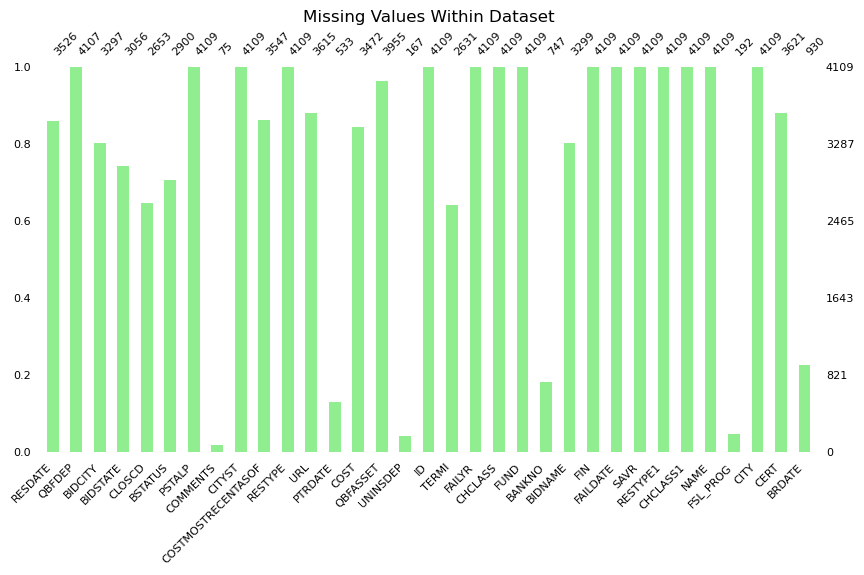

In [8]:
# Visualise the missing values in the dataset
msno.bar(df, color='lightgreen', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

In [9]:
# Getting the sum of null values in each column
df.isnull().sum()

RESDATE                583
QBFDEP                   2
BIDCITY                812
BIDSTATE              1053
CLOSCD                1456
BSTATUS               1209
PSTALP                   0
COMMENTS              4034
CITYST                   0
COSTMOSTRECENTASOF     562
RESTYPE                  0
URL                    494
PTRDATE               3576
COST                   637
QBFASSET               154
UNINSDEP              3942
ID                       0
TERMI                 1478
FAILYR                   0
CHCLASS                  0
FUND                     0
BANKNO                3362
BIDNAME                810
FIN                      0
FAILDATE                 0
SAVR                     0
RESTYPE1                 0
CHCLASS1                 0
NAME                     0
FSL_PROG              3917
CITY                     0
CERT                   488
BRDATE                3179
dtype: int64

### Importing the cleaned Dataset

In [12]:
df_cleaned = pd.read_csv('cleaned_failed_banks.csv')

In [13]:
#  Checking the first fiverows of the df_cleaned dataset
df_cleaned.head()

,Date_of_resolution,Quasi-bid_deposits,Postal_code,Cost_recent_date,Resolution_type,URL_link,Quasi-bid_assets,Identification,Year_of_failure,Charter_class,Fund,Financial_institution_number,Date_of_failure,Savings_ratio,Additional_resolution_info,Additional_charter_class_info,Bank_Name,City,Certification,State
0,2020-10-23,64941.0,KS,29FEB2024,FAILURE,https://www.fdic.gov/news/press-releases/2020/...,65733.0,3452,2020,NM,5,10538,2020-10-23,DIF,PA,NM,ALMENA STATE BANK,ALMENA,15426.0,KS
1,2020-10-16,133936.0,FL,29FEB2024,FAILURE,https://www.fdic.gov/news/press-releases/2020/...,136566.0,3451,2020,NM,5,10537,2020-10-16,DIF,PA,NM,FIRST CITY BANK OF FLORIDA,FORT WALTON BEACH,16748.0,FL
2,2020-04-03,143102.0,WV,29FEB2024,FAILURE,https://www.fdic.gov/news/news/press/2020/pr20...,151808.0,3450,2020,NM,5,10536,2020-04-03,DIF,PA,NM,THE FIRST STATE BANK,BARBOURSVILLE,14361.0,WV
3,2020-02-14,95159.0,NE,29FEB2024,FAILURE,https://www.fdic.gov/news/news/press/2020/pr20...,100879.0,3449,2020,NM,5,10535,2020-02-14,DIF,PA,NM,ERICSON STATE BANK,ERICSON,18265.0,NE
4,2019-11-01,111234.0,NJ,29FEB2024,FAILURE,https://www.fdic.gov/news/news/press/2019/pr19...,120574.0,3448,2019,N,5,10534,2019-11-01,DIF,PA,N,CITY NATIONAL BANK OF NEW JERSEY,NEWARK,21111.0,NJ
